<a href="https://colab.research.google.com/github/nikbizkit/MMO/blob/main/%D0%A0%D0%9A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Бакланов Никита
# ИУ5-23м
# РК1

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
!unzip /content/drive/MyDrive/Colab_data/MMO/archive.zip

Archive:  /content/drive/MyDrive/Colab_data/MMO/archive.zip
  inflating: autoru_total.csv        


In [ ]:
data = pd.read_csv('/content/autoru_total.csv', sep=',')

In [ ]:
data.head()

,Model,Year,Mileage,V_engine,EngineType,HorsePower,Tax,State,Owners,Passport,Customs,Selector,Color,CarBodyType,Accidents,Drive,Price
0,Subaru Forester IV,2013,83800.0,2.5,Бензин,171.0,8379.0,Не требует ремонта,2 владельца,Оригинал,Растаможен,вариатор,серебристый,внедорожник 5 дв.,ДТП ненайдены,полный,1499999.0
1,Opel Zafira B Рестайлинг,2014,97265.0,1.8,Бензин,140.0,4900.0,Не требует ремонта,1 владелец,Оригинал,Растаможен,механическая,чёрный,компактвэн,NaN,передний,1000000.0
2,Kia Rio IV,2017,48000.0,1.6,Бензин,123.0,3075.0,Не требует ремонта,2 владельца,Оригинал,Растаможен,автоматическая,синий,седан,NaN,передний,945000.0
3,Skoda Octavia II (A5) Рестайлинг,2011,292000.0,1.4,Бензин,122.0,4148.0,Не требует ремонта,2 владельца,Оригинал,Растаможен,роботизированная,серебристый,лифтбек,NaN,передний,535000.0
4,Audi A6 IV (C7) Рестайлинг,2015,106205.0,1.8,Бензин,190.0,9500.0,Не требует ремонта,2 владельца,Оригинал,Растаможен,роботизированная,чёрный,седан,NaN,передний,1764000.0


## Задача №4

Для набора данных проведите кодирование одного (произвольного) категориального признака с использованием метода "label encoding".

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
data['Selector'].unique()

array(['вариатор', 'механическая', 'автоматическая', 'роботизированная'],
      dtype=object)

In [ ]:
le = LabelEncoder()
cat_le = le.fit_transform(data['Selector'])
np.unique(cat_le)

array([0, 1, 2, 3])

In [ ]:
data['Selector_le'] = cat_le
data.head()

,Model,Year,Mileage,V_engine,EngineType,HorsePower,Tax,State,Owners,Passport,Customs,Selector,Color,CarBodyType,Accidents,Drive,Price,Selector_le
0,Subaru Forester IV,2013,83800.0,2.5,Бензин,171.0,8379.0,Не требует ремонта,2 владельца,Оригинал,Растаможен,вариатор,серебристый,внедорожник 5 дв.,ДТП ненайдены,полный,1499999.0,1
1,Opel Zafira B Рестайлинг,2014,97265.0,1.8,Бензин,140.0,4900.0,Не требует ремонта,1 владелец,Оригинал,Растаможен,механическая,чёрный,компактвэн,NaN,передний,1000000.0,2
2,Kia Rio IV,2017,48000.0,1.6,Бензин,123.0,3075.0,Не требует ремонта,2 владельца,Оригинал,Растаможен,автоматическая,синий,седан,NaN,передний,945000.0,0
3,Skoda Octavia II (A5) Рестайлинг,2011,292000.0,1.4,Бензин,122.0,4148.0,Не требует ремонта,2 владельца,Оригинал,Растаможен,роботизированная,серебристый,лифтбек,NaN,передний,535000.0,3
4,Audi A6 IV (C7) Рестайлинг,2015,106205.0,1.8,Бензин,190.0,9500.0,Не требует ремонта,2 владельца,Оригинал,Растаможен,роботизированная,чёрный,седан,NaN,передний,1764000.0,3


In [ ]:
le.inverse_transform([0, 1, 2, 3])

array(['автоматическая', 'вариатор', 'механическая', 'роботизированная'],
      dtype=object)

## Задача 24

Для набора данных для одного (произвольного) числового признака проведите обнаружение и удаление выбросов на основе 5% и 95% квантилей.


In [ ]:
data.shape

(36906, 18)

In [ ]:
lower_boundary = data['Price'].quantile(0.05)
upper_boundary = data['Price'].quantile(0.95)

outliers_temp = np.where(data['Price'] > upper_boundary, True, 
                                 np.where(data['Price'] < lower_boundary, True, False))
data_trimmed = data.loc[~(outliers_temp), ]  
data_trimmed.shape

(33226, 18)

Для студентов групп ИУ5-23М, ИУ5И-23М - для произвольной колонки данных построить график "Ящик с усами (boxplot)".

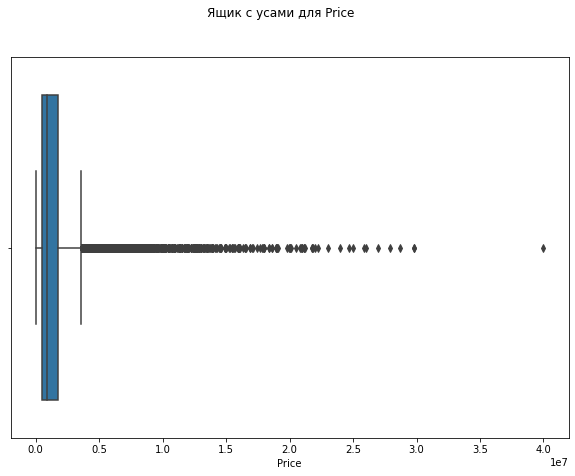

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(x=data['Price'])  
fig.suptitle('Ящик с усами для Price')
plt.show()

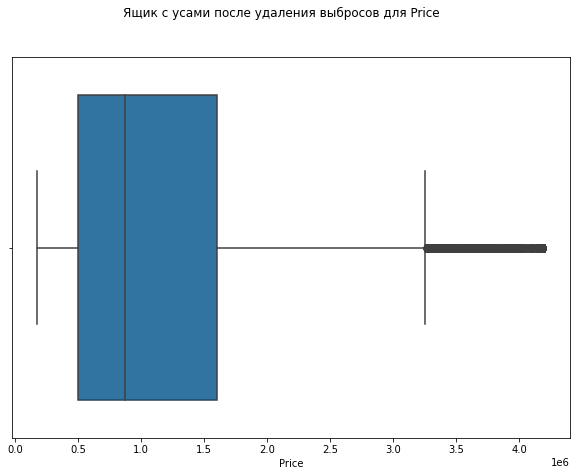

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(x=data_trimmed['Price'])  
fig.suptitle('Ящик с усами после удаления выбросов для Price')
plt.show()